<div style="text-align: center;" role="presentation">
<h1 role="presentation"><strong><span role="presentation">An&aacute;lisis Num&eacute;rico para Ingenier&iacute;a - I Semestre 2020</span></strong></h1>

<h1 style="text-align: center;"><span style="color: #0000ff;">TAREA 2</span></h1>

<p><strong>Descripci&oacute;n:&nbsp;</strong>Este documento presenta la resolucion de la tarea 2 del curso Analisis Numerico para Ingenieria.</p>

<p><strong>Integrantes</strong><ul>
<li>Kenneth Jeanpol Alvarado Mendez 2015095715</li>
</ul>.</p>


<a id='biseccion'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong></strong>Parte 1: Método de Newton-Raphson</span></span></h2>

<h3><strong>a) C&oacute;digo en GNU Octave</strong></h3>

In [1]:
warning('off')
function [xk,k,err] = newtonRaphson(f,vars,x0,tol,maxIter)
  syms x y z
  xk=x0';
  Jf=jacobian(f,vars);
  k=0;
  err=tol+1;
  iteraciones=[0];
  error=[err];
  while(k<maxIter&& err>tol)
    Jf_xk=subs(Jf, vars, xk);
    f_xk=(subs(f, vars, xk))';
    xk= xk-linsolve(double(Jf_xk), double(f_xk));
    k=k+1;
    f_xk=double(subs(f, vars, xk));
    err=double(norm(f_xk));
    iteraciones=[iteraciones k];
    error=[error err];
  endwhile
  plot(iteraciones,error,'b--o')
endfunction

<h3><strong>b) Problema a Resolver</strong></h3>

Use la iteración de Newton para aproximar la solución del sistema no lineal

$\left\{\begin{matrix}
cos(x_{2})-cos(x_{1}) &= & 0 \\ 
x_{3}^{x_{1}} &= & \frac{1}{x_{2}} \\ 
 e^{x_{1}}-x_{3}^{2}&= & 0
\end{matrix}\right.$

Utilice $x_0=(0.5,0.5,0.5)^{t}$ , $tol= 10^{-5}$ , $iterMax=1000$

Symbolic pkg v2.8.0: Python communication link active, SymPy v1.4.
xk =

   0.78521
   0.49661
   0.36992

k =  3
err =  0.000078743


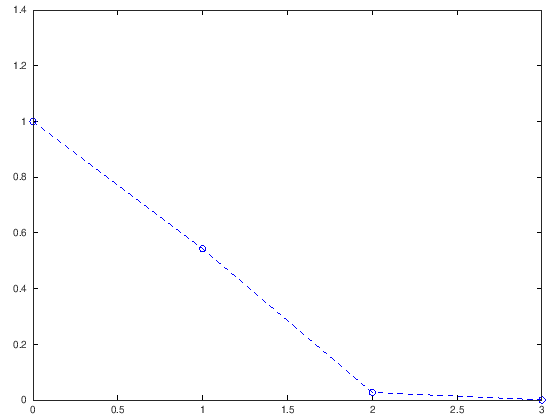

In [2]:
pkg load symbolic
syms x y z
f=[(x**2)+(y**2)+(z**2)-1,(2*x**2)+(y**2)-4*z,(3*x**2)-(4*y)+z**2];
vars=[x,y,z];
x0=[0.5 0.5 0.5];
tol=0.0001;
maxIter=5;
[xk,k,err]=newtonRaphson(f,vars,x0,tol,maxIter)

<a id='biseccion'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong></strong>Parte 1: Método de Newton-Raphson</span></span></h2>

<h3><strong>a) C&oacute;digo en GNU Octave</strong></h3>

In [63]:
pkg load symbolic
function [x_k,itera] = metodo1(F,vars,x_0,tol) 
    w=[];
    x=[];
    y=[];
    z=[];
    error=[];
    a=1;
    b=-2;
    itera=0;
    iteraciones=[];
    ep=tol+1;
    JF= jacobian(F,vars);

    while(ep>tol)
        Jx_kF = linsolve(double(Fx(JF,vars,x_0)), double(-Fx(F, vars, x_0))');

        y_k=x_0 + (1/2)*(Jx_kF');

        JF_sol = linsolve(double(Fx(JF,vars,y_k)), double(-Fx(F, vars, x_0))');

        z_k = x_0 + JF_sol';

        M = double(a * Fx(JF,vars,x_0) + b *  Fx(JF,vars,y_k));

        Fz= double(Fx(F,vars,z_k));

        M_solve = linsolve(M,-Fz');

        x_k = z_k + M_solve';

        x_0=x_k;

        itera = itera+ 1;
        iteraciones=[iteraciones itera];
        w=[w x_0(1)];
        x=[x x_0(2)];
        y=[y x_0(3)];
        z=[z x_0(4)];
        error=[error ep];
        ep=double(norm(Fx(F,vars,x_0)));
    endwhile
    plot(iteraciones,error,'b--o') 
     
endfunction

function F = Fx(f,vars,x_0) 
    F=subs(f, vars, x_0);     
endfunction

<h3><strong>b) Problema a Resolver</strong></h3>

In [ ]:
pkg load symbolic
syms x y z w
f=[(w**2)+x-(3*y)+(4*z)+(3/4),(3*w**2)+x-(y**2)+(z**2)+(13/4),(5*w)+(3*x**2)+y-(4*z**2)-(99/2),(8*w**2)-(14*x)+(6*y**2)-(7*z**2)+7];
vars=[w,x,y,z];
x0=[2 1 2 1];
tol=0.1;
[x_k,itera]=metodo1(f,vars,x0,tol)